In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
from astropy.io import ascii
import os
import sys
from ipywidgets import interactive, widgets,fixed
from IPython.display import Audio, display
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation,FFMpegWriter
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (11., 8.0)
rcParams['text.latex.preamble'] = ['\\usepackage{siunitx}']
#rcParams['axes.labelsize']='x-large'
from scipy.integrate import quad

In [1]:
Radius = 1.0
Density1 = 10.
P0=1e-8
T0=10891304347826.088
def rho(r,a): return np.piecewise(r, [r < Radius , r >= Radius], [lambda r: Density1/r**a, 1.])
def mass(r,a): return 4.*np.pi*r**2 * rho(r,a)
def massmo(r,a): return 4.*np.pi*r**2 * rho(r,a) *24.73 #(10pc)^3 * hydrogen_mass /cm^3 = 24.73 Mo

In [2]:
Tmin=9.914745e-06

In [3]:
print (1e-9*T0/1e-9)

1.08913043478e+13


In [4]:
r=np.linspace(0,3,500)
plt.ylabel('Number Density $(\si{cm^{-3}})$')
plt.xlabel('Radius $(\SI{10}{pc})$')
plt.yscale('log')
plt.plot(r,rho(r,2.3),label=-2.3)
plt.plot(r,rho(r,2.),label=-2)
plt.plot(r,rho(r,3.),label=-3)
plt.legend()

NameError: name 'np' is not defined

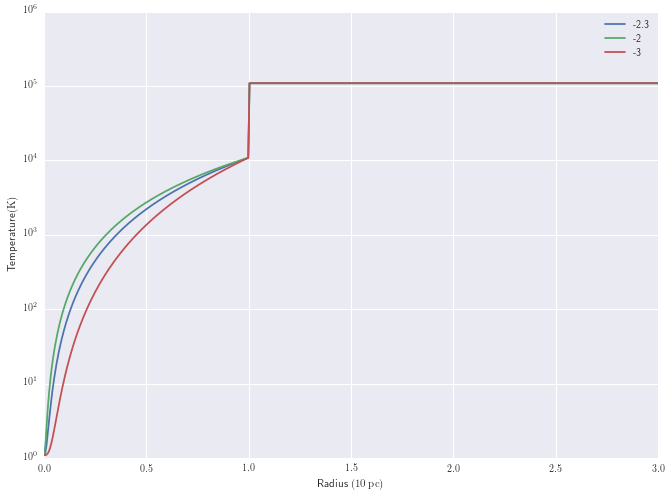

In [80]:
plt.ylabel('Temperature$(\si{K})$')
plt.xlabel('Radius $(\SI{10}{pc})$')
plt.yscale('log')
plt.plot(r,P0*T0/rho(r,2.3),label=-2.3)
plt.plot(r,P0*T0/rho(r,2.),label=-2)
plt.plot(r,P0*T0/rho(r,3.),label=-3)
plt.legend()

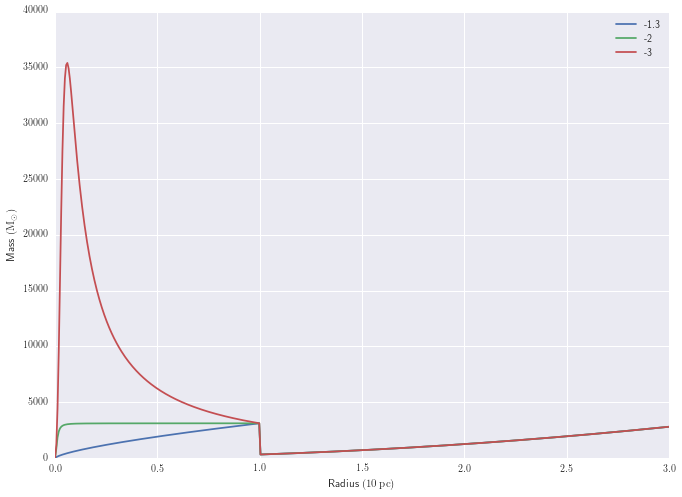

In [73]:
plt.plot(r,massmo(r,1.3),label=-1.3)
plt.plot(r,massmo(r,2.),label=-2)
plt.plot(r,massmo(r,3.),label=-3)
plt.ylabel('Mass $(\si{M_\odot})$')
plt.xlabel('Radius $(\SI{10}{pc})$')
plt.legend()

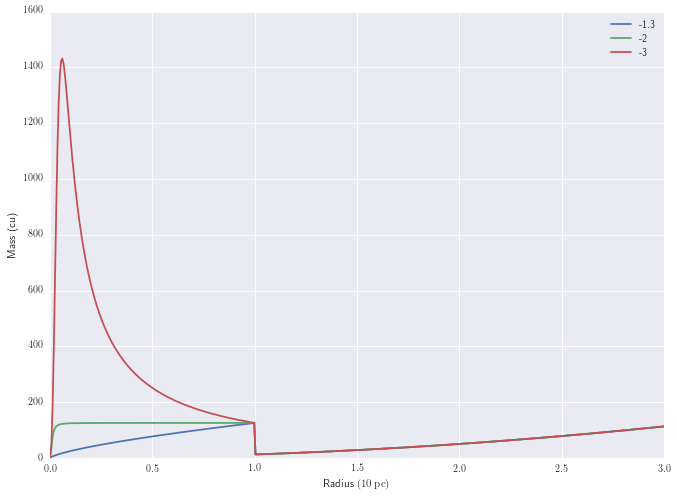

In [74]:
plt.plot(r,mass(r,1.3),label=-1.3)
plt.plot(r,mass(r,2.),label=-2)
plt.plot(r,mass(r,3.),label=-3)
plt.ylabel('Mass (cu)')
plt.xlabel('Radius $(\SI{10}{pc})$')
plt.legend()

In [77]:
TotalMass=quad(massmo,0,Radius,args=1.3)[0]
print u'Total Mass: {:e} M☉'.format(TotalMass)
TotalMass=quad(massmo,0,Radius,args=2.)[0]
print u'Total Mass: {:e} M☉'.format(TotalMass)
TotalMass=quad(massmo,0,Radius,args=3.)[0]
print u'Total Mass: {:e} M☉'.format(TotalMass)

Total Mass: 1.827314e+03 M☉
Total Mass: 3.059159e+03 M☉
Total Mass: 9.540983e+03 M☉


In [49]:
Density1*4.*np.pi*Radius*24.73

994.4523049379275

In [2]:
cooltable=np.loadtxt('cooltable.dat')

IOError: [Errno 2] No such file or directory: 'cooltable.dat'

In [4]:
T= cooltable[:,0]
Lambda = cooltable[:,1]

NameError: name 'cooltable' is not defined

In [ ]:
#plt.plot(TT,fc(TT))
plt.yscale('log')
plt.xlim(0,1000)
plt.plot(T,Lambda,'o')

In [3]:
plt.loglog(T,Lambda,linewidth=5.,label='$\Lambda (T) \, (\si{ergs.cm^3 s^{-1}})$')
#plt.ylabel('$\Lambda (T) \, (\si{ergs.cm^3 s^{-1}})$',fontsize=25)
plt.xlabel('Temperature (K)',fontsize=25)
plt.yticks(fontsize=26)
plt.xticks(fontsize=29)
plt.tight_layout()
plt.legend(loc=4,fontsize=30)
#plt.savefig('LambdaT.png')

NameError: name 'T' is not defined

In [13]:
from scipy.optimize import curve_fit

In [ ]:
curve_fit()

In [27]:
def f2(x,a,b,c): return a*x**2+b*x+c
def f1(x,b,c): return b*x+c

In [47]:
p,dp2=curve_fit(f2,T[T>1e8],Lambda[T>1e8],[0,6.6e-32,1e-21])
dp=np.sqrt(np.diag(dp2))

In [48]:
p

array([  2.65911050e-42,   4.53023788e-32,   4.10642186e-23])

$$
2.659\times 10^{-42} x^2 + 4.53 \times 10^{-32} x + 4.106\times 10^{-23}
$$

In [46]:
dp[0]/p[0],dp[1]/p[1],dp[2]/p[2]

(0.028120164461815242, 0.013654106744734372, 0.018721179167672054)

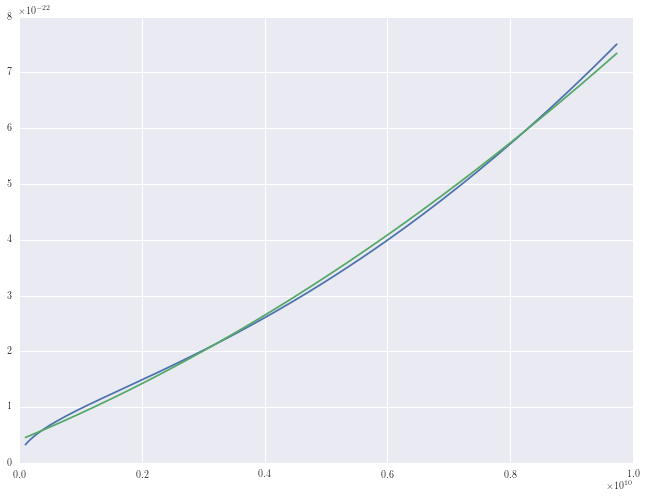

In [34]:
plt.plot(T[T>1e8],Lambda[T>1e8])
plt.plot(T[T>1e8],f2(T[T>1e8],p[0],p[1],p[2]))

In [53]:
TT=np.logspace(8,11)

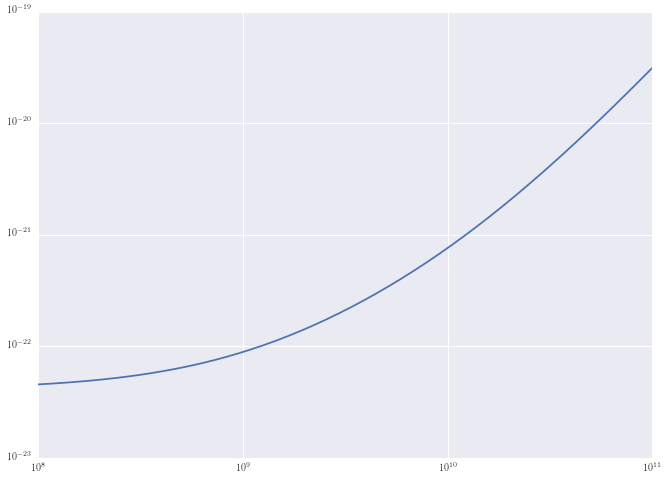

In [55]:
plt.loglog(TT,f2(TT,p[0],p[1],p[2]))